## <span style="color:blue">  Numerical exercises 1</span>

1. $\langle r \rangle = \int_0^1 r dr = 1/2$. <font color="red">Make a picture of the estimation of $\langle r \rangle$ and its uncertainty (which corresponds to Standard Deviation of the mean for the estimation of $\langle r \rangle$) with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font> (see below: Computing statistical uncertainties).

- i will use 100 blocks of 1000 iteration each

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import norm
from scipy.stats import cauchy

In [25]:
plt.rcParams.update({'font.size': 15})

In [26]:
data = np.loadtxt("../c++/es 1/ex_1.1.1.dat")
means = data[:, 0]  
stds = data[:, 1]  

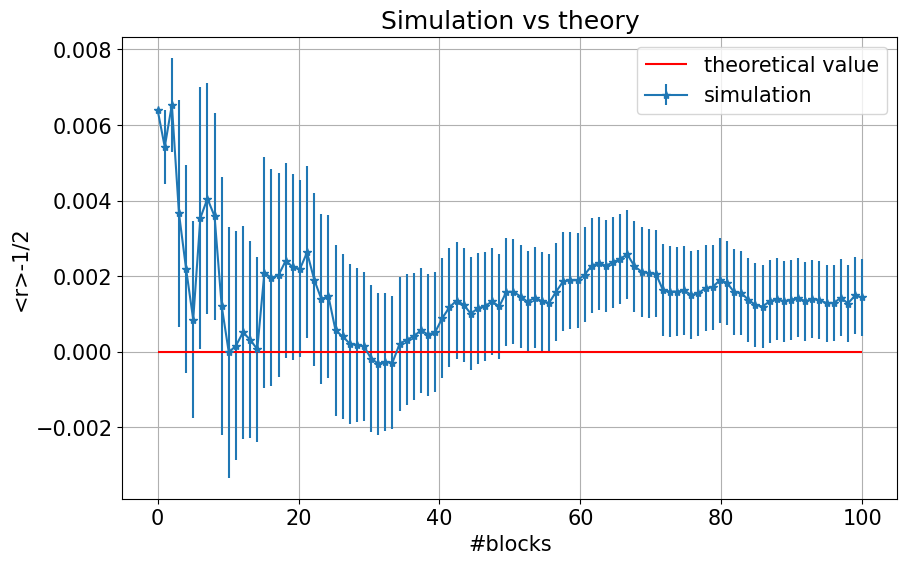

best estimated integral value =  0.50144 +/- 0.00101


In [28]:
x = np.linspace(0,100,100)
fig = plt.figure(figsize = (10,6) )
plt.errorbar(x,means-0.5,yerr=stds, label="simulation",marker="*")
plt.hlines(0,0,N,color="red", label = "theoretical value")
plt.legend()
plt.xlabel('#blocks')
plt.ylabel('<r>-1/2')
plt.grid(True)
plt.title("Simulation vs theory")

plt.show()

print("best estimated integral value = ", round(means[-1],5), "+/-", round(stds[-1],5))

We can see there is a good convergence to te expected value. The simulation value is into 2sigma confidence level from the theoretical value.

2. $\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$. <font color="red">Make a picture of the estimation of $\sigma^2$ and its uncertainty (which corresponds to Standard Deviation of the mean for the estimation of $\langle (r-1/2)^2 \rangle$) with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font> (see below: Computing statistical uncertainties).

In [6]:
data = np.loadtxt("../c++/es 1/ex_1.1.2.dat")
means = data[:, 0]  
stds = data[:, 1]  

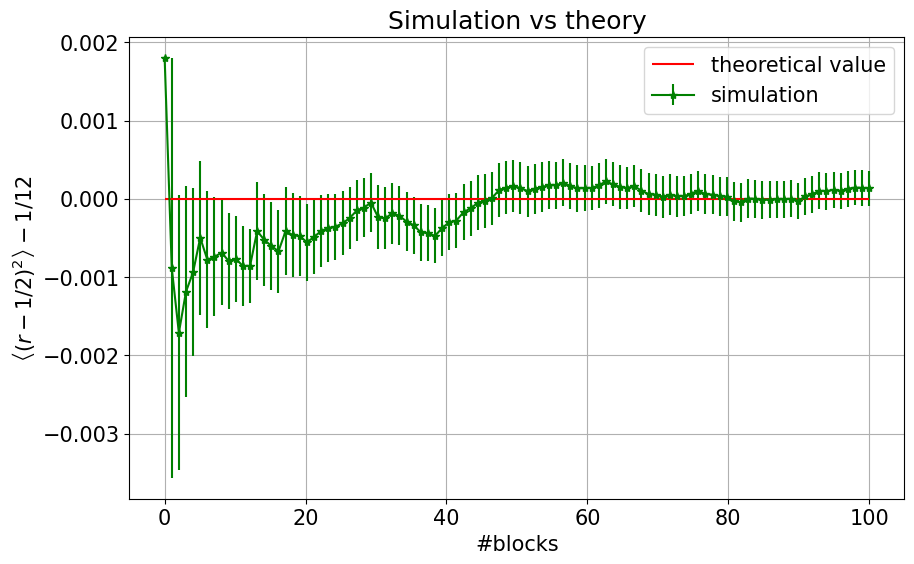

best estimated integral value =  0.08347 +/- 0.00022


In [7]:
M=100000
N=100
L=int(M/N)
x = np.linspace(0,100,100)
fig = plt.figure(figsize = (10,6) )
plt.errorbar(x,means-1/12,yerr=stds, label="simulation",marker="*",color="green")
plt.hlines(0,0,N,color="red", label = "theoretical value")
plt.legend()
plt.xlabel('#blocks')
plt.ylabel(r'$\left\langle \left(r-1/2\right)^2 \right\rangle - 1/12$')
plt.grid(True)
plt.title("Simulation vs theory")

plt.show()

print("best estimated integral value = ", round(means[-1],5), "+/-", round(stds[-1],5))

Also here there is a good convergence, we can see also in the plot that the expected value is included between the error bars.

3. Divide $[0,1]$ into $M$ identical sub-intervals and implement the $\chi^2$ test. Obviously, the number of expected events observed in each sub-interval after $n$ *throws*, according to a uniform distribution, is $np = n\times 1/M= n/M$. Fix $M=10^2$ and use for $n$ the first $10^4$ pseudo-random numbers, then the successive $10^4$ pseudo-random numbers, and so on ... 100 times. <font color="red">Plot $\chi^2_j$ for $j=1, ..., 100$</font>. In this case the chi-square statistic is:
$$\chi^2 = \sum_{i=1}^M \frac{\left( n_i - n/M \right)^2}{n/M}$$
We should expect on average that $(n_i - n/M)^2 \simeq n/M$ and thus $\chi^2 \simeq 100$, i.e. the number of sub-intervals.
A larger value of $\chi^2$ indicates that the hypothesis ($n_i$ are drawn from a uniform distribution) is rather unlikely ... <font color="red">but before judging</font>, you could compare the histogram of the values obtained for $\chi^2_j$ with the true probability distribution (see: <a href="https://en.wikipedia.org/wiki/Chi-squared_distribution">this Wikipedia link</a>).

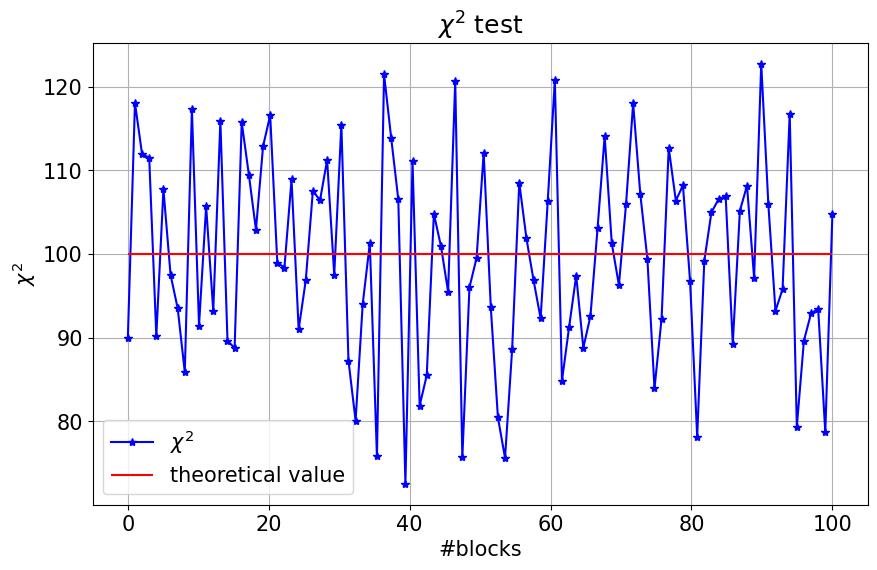

<chi^2> =  99.69159999999998


In [10]:
M=10000
n=100
x = np.linspace(0,100,100) 
chi = np.loadtxt("../c++/es 1/ex_1.1.3.dat")

fig = plt.figure(figsize = (10,6) )
plt.plot(x,chi, label = "$\chi^{2}$",marker="*",color="blue")
plt.xlabel('#blocks')
plt.ylabel("$\chi^{2}$",fontsize = 15)
plt.hlines(100,0,x[-1], label ="theoretical value", color = "red")
plt.grid(True)
plt.legend(loc = 'best')
plt.title("$\chi^{2}$ test")
plt.show()


chi2_mean = np.sum(chi)/n
print("<chi^2> = ", chi2_mean)

from this $\chi^2$ test we can see that the mean value of 100 blocks is close to the expected value, so we can reject the hypotesis that the data don't follow a uniform distribution

### Exercise 01.2
- Extend Pseudo-Random Number generator downloaded from the NSL Ariel web site and check the Central Limit Theorem:

1. <font color="red">Add two probability distributions</font> by using the **method of the inversion of the cumulative distribution** to sample from a **generic** <font color="red">exponential distribution</font>, $p(x) = \lambda \exp(-\lambda x)$, $x\in [0;+\infty]$ (see <a href="https://en.wikipedia.org/wiki/Exponential_distribution">this Wikipedia link</a>), and a **generic** <font color="red">Cauchy-Lorentz distribution</font> $p(x)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}$, $x\in [-\infty;+\infty]$ (see <a href="https://en.wikipedia.org/wiki/Cauchy_distribution">this Wikipedia link</a>).
2. <font color="red">Make 3 pictures</font> with the histograms obtained filling them with $10^4$ realizations of $S_N = \frac{1}{N}\sum_{i=1}^N x_i$ (for $N=1, 2, 10, 100$), being $x_i$ a random variable sampled throwing a *standard* dice (fig.1), an *exponential* dice (fig.2, use $\lambda=1$) and a *Lorentzian* dice (fig.3, use $\mu=0$ and $\Gamma=1$).

Note tha you can try to fit the case $N=100$ with a Gaussian for standard and exponential dices, whereas you should use a Cauchy-Lorentz distribution for the last case.

We will verify the CLT for 3 different distribution (uniform, exponential and lorentzian). The following histograms represent the $10^4$ realizations of the $S_N = \frac{1}{N}\sum_{i=1}^N x_i$ (for $N=1, 2, 10, 100$) for each type of distribution

**UNIFORM**

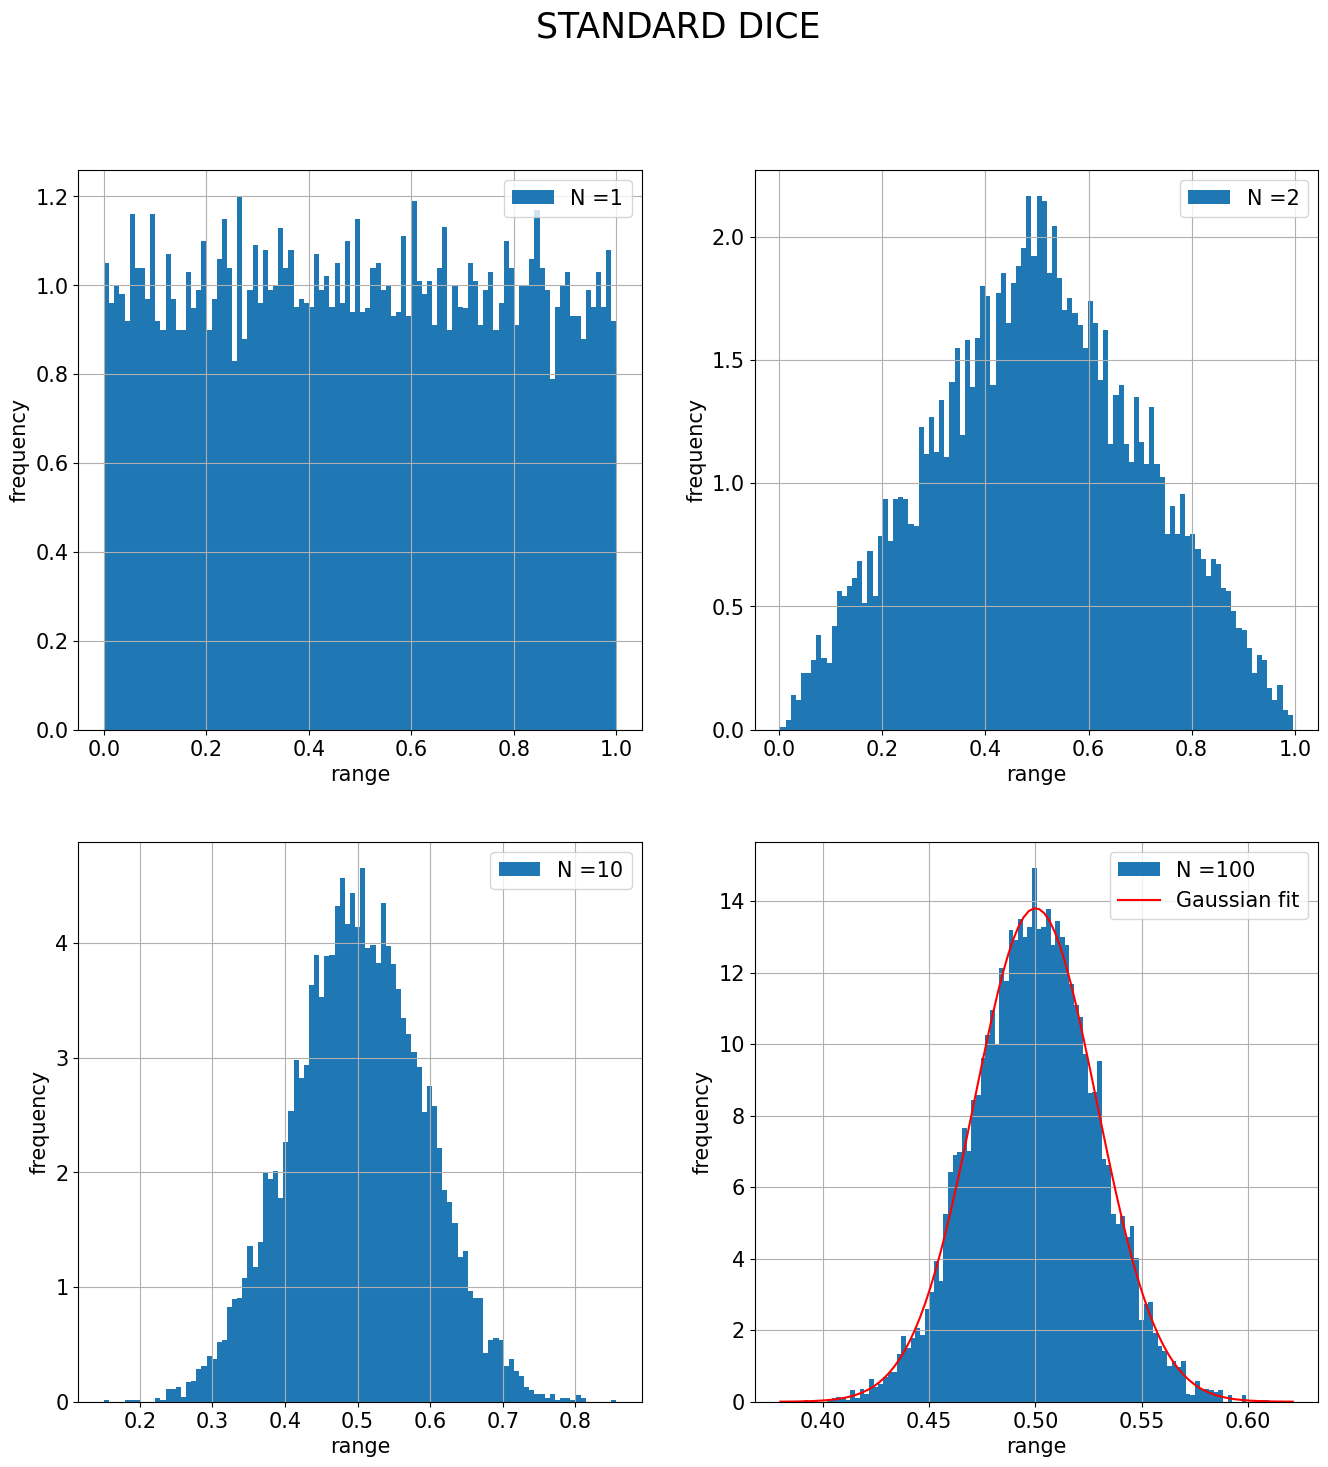

In [11]:
N=[1,2,10,100]
x=np.arange(10000)
sum= np.loadtxt('../c++/es 1/unif_1.2.dat', usecols=(0,1,2,3), delimiter=' ', unpack='true')
n_bins = 100
fig, axs = plt.subplots(2,2, figsize = (16,16) )
plt.suptitle("STANDARD DICE", fontsize=25)
axs[0,0].hist(sum[0], n_bins, density= 'true', label = "N =" + str(N[0]))
axs[0,1].hist(sum[1], n_bins, density= 'true', label = "N =" + str(N[1]))
axs[1,0].hist(sum[2], n_bins, density= 'true', label = "N =" + str(N[2]))
axs[1,1].hist(sum[3], n_bins, density= 'true', label = "N =" + str(N[3]))

mean,std=norm.fit(sum[3])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
y = norm.pdf(x, mean, std)
axs[1,1].plot(x,y, label = "Gaussian fit",color="red")

for i in range(2) :
    for j in range(2):
        axs[i,j].set_xlabel('range')
        axs[i,j].set_ylabel('frequency')
        axs[i,j].grid(True)
        axs[i,j].legend()
plt.show()

**LORENTZIAN**

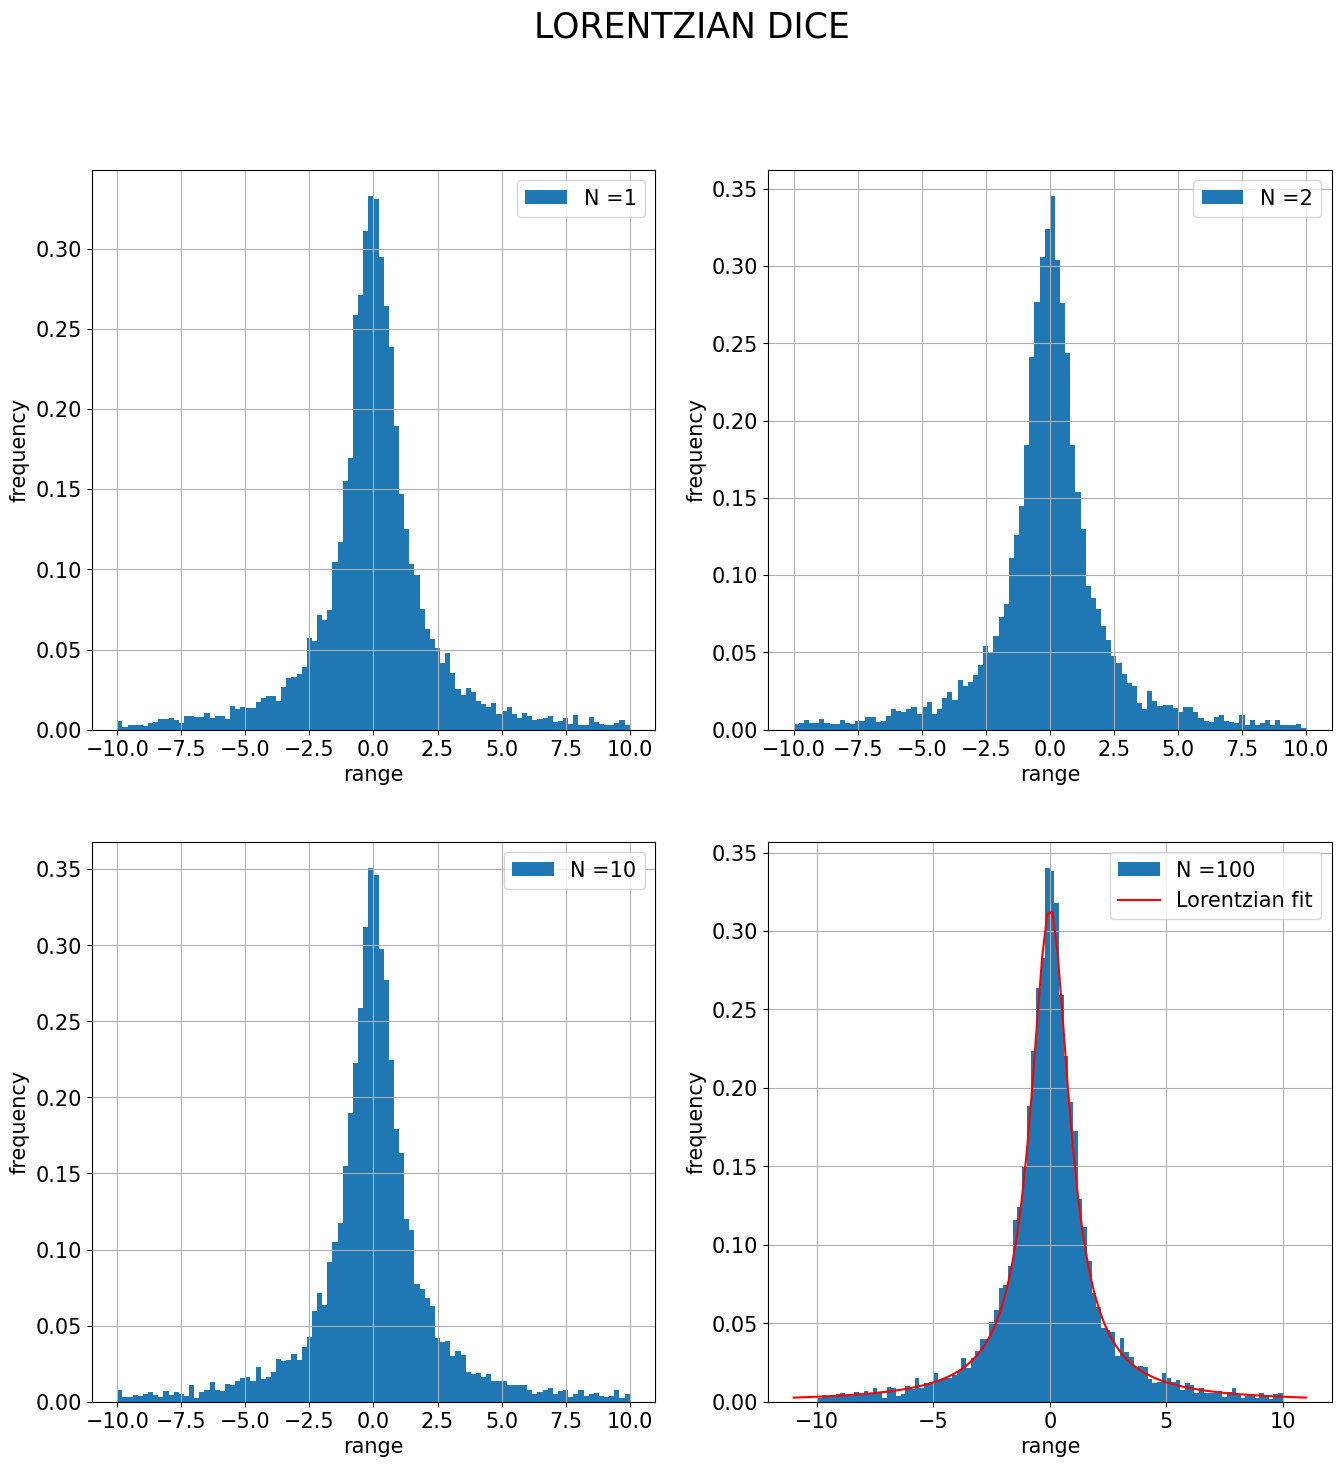

In [103]:
N=[1,2,10,100]
x=np.arange(10000)
sum= np.loadtxt('../c++/es 1/lor_1.2.dat', usecols=(0,1,2,3), delimiter=' ', unpack='true')
n_bins = 100
fig, axs = plt.subplots(2,2, figsize = (16,16) )
plt.suptitle("LORENTZIAN DICE", fontsize=25)
axs[0,0].hist(sum[0], n_bins, density= 'true', range = (-10,10), label = "N =" + str(N[0]))
axs[0,1].hist(sum[1], n_bins, density= 'true', range = (-10,10), label = "N =" + str(N[1]))
axs[1,0].hist(sum[2], n_bins, density= 'true', range = (-10,10), label = "N =" + str(N[2]))
axs[1,1].hist(sum[3], n_bins, density= 'true', range = (-10,10), label = "N =" + str(N[3]))

mean,std=cauchy.fit(sum[3])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
y = cauchy.pdf(x, mean, std)
axs[1,1].plot(x,y, label = "Lorentzian fit",color="red")

for i in range(2) :
    for j in range(2):
        axs[i,j].set_xlabel('range')
        axs[i,j].set_ylabel('frequency')
        axs[i,j].grid(True)
        axs[i,j].legend()
plt.show()

**EXPONENTIAL**

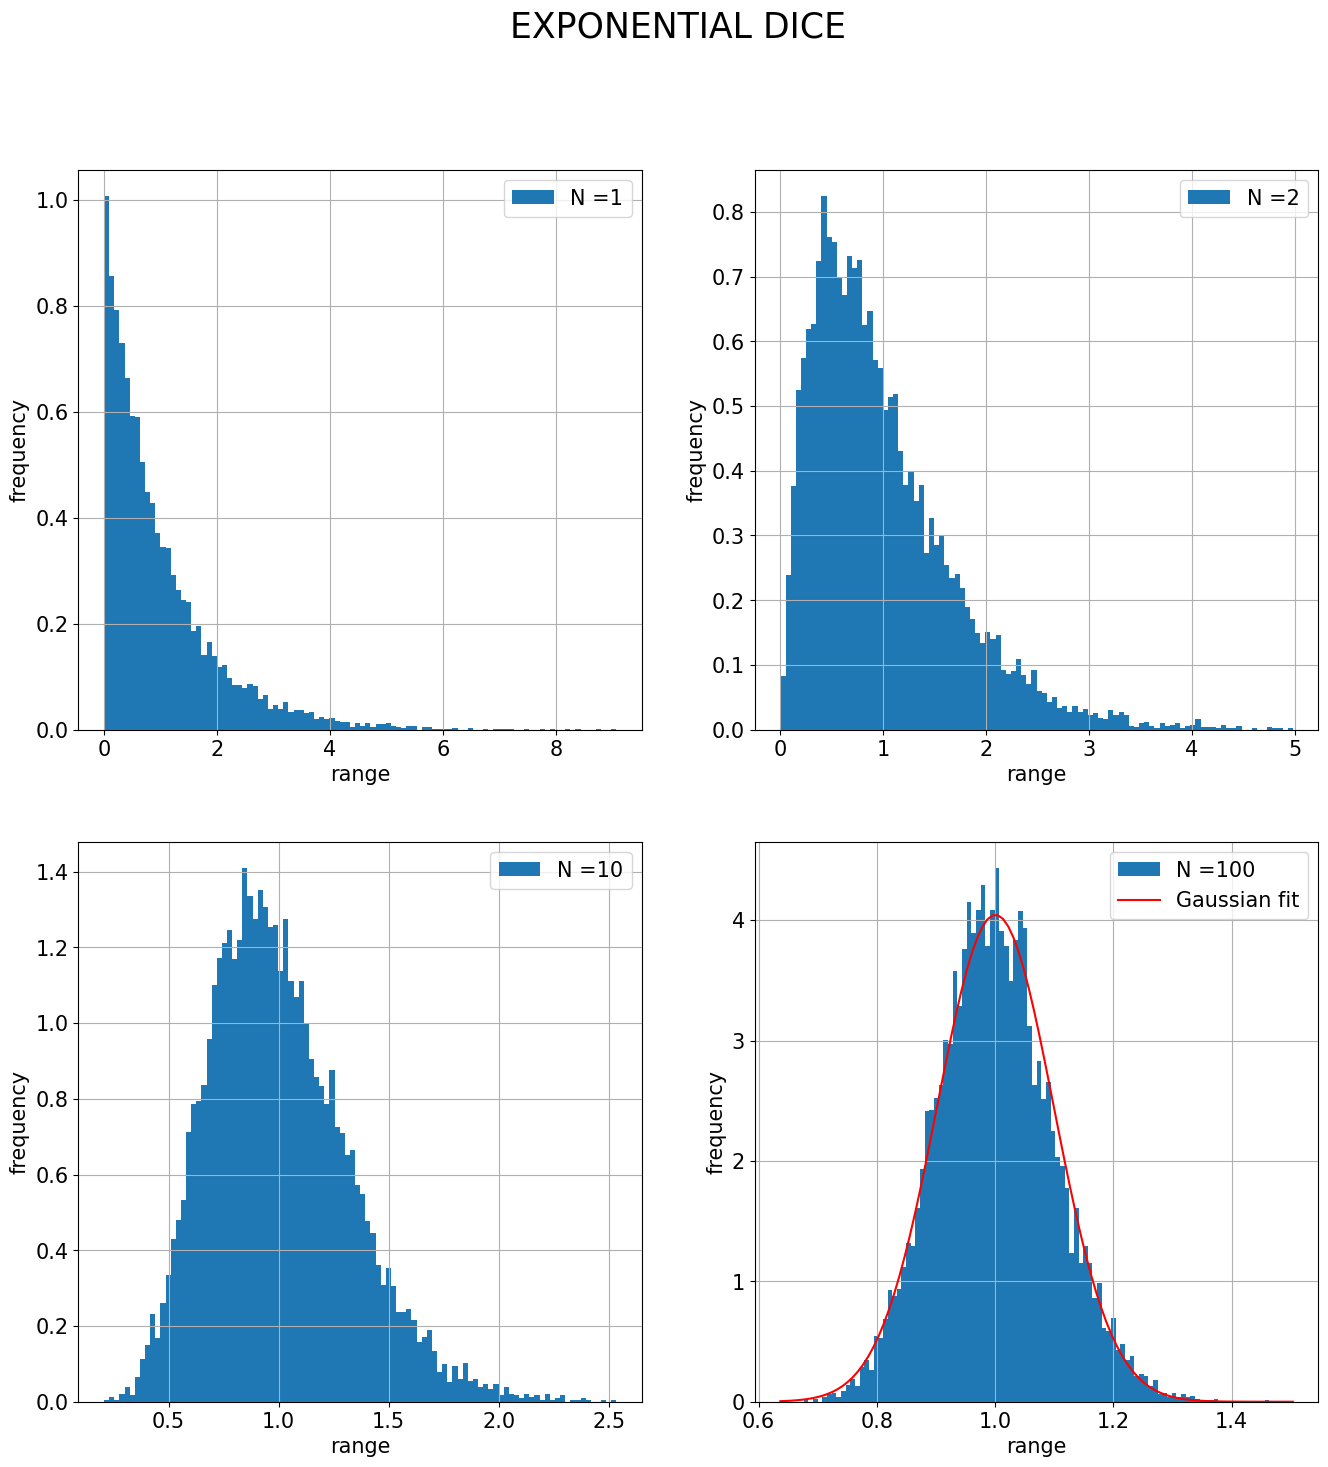

In [104]:
N=[1,2,10,100]
x=np.arange(10000)
sum= np.loadtxt('../c++/es 1/exp_1.2.dat', usecols=(0,1,2,3), delimiter=' ', unpack='true')
n_bins = 100
fig, axs = plt.subplots(2,2, figsize = (16,16) )
plt.suptitle("EXPONENTIAL DICE", fontsize=25)
axs[0,0].hist(sum[0], n_bins, density= 'true', label = "N =" + str(N[0]))
axs[0,1].hist(sum[1], n_bins, density= 'true', label = "N =" + str(N[1]))
axs[1,0].hist(sum[2], n_bins, density= 'true', label = "N =" + str(N[2]))
axs[1,1].hist(sum[3], n_bins, density= 'true', label = "N =" + str(N[3]))

mean,std=norm.fit(sum[3])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
y = norm.pdf(x, mean, std)
axs[1,1].plot(x,y, label = "Gaussian fit",color="red")

for i in range(2) :
    for j in range(2):
        axs[i,j].set_xlabel('range')
        axs[i,j].set_ylabel('frequency')
        axs[i,j].grid(True)
        axs[i,j].legend()
plt.show()

### Exercise 01.3
- **Simulate** the Buffon’s experiment (see LSN_Lecture_00, supplementary material):  A needle of length $L$ is thrown at random onto a horizontal plane ruled with straight lines a distance $d$ (must be $d > L$, but do not use $d\gg L$ otherwise $P\ll 1$) apart. The probability $P$ that the needle will intersect one of these lines is: $P = 2L/\pi d$. This could be used to evaluate $\pi$ from throws of the needle: if the needle is thrown down $N_{thr}$ times and is observed to land on a line $N_{hit}$ of those times, we can make an estimate of $\pi$ from
$$\pi = \frac{2L}{Pd} = \lim_{N_{thr} \to \infty}\frac{2LN_{thr}}{N_{hit}d}$$
<font color="red">Make a picture of the estimation of $\pi$ and its uncertainty (Standard Deviation of the mean) with a large number of *throws* $M$ as a function of the number of blocks, $N$</font> (see below: Computing statistical uncertainties). If possible, do not use $\pi$ to evaluate $\pi$.


In the following plot, you'll see the Buffon's experiment made with 100 blocks with 1M of throws each. You can see that the simulations are very close to the theoretical value

In [17]:
data = np.loadtxt("../c++/es 1/pi.dat")
means = data[:, 1]  
stds = data[:, 2]  

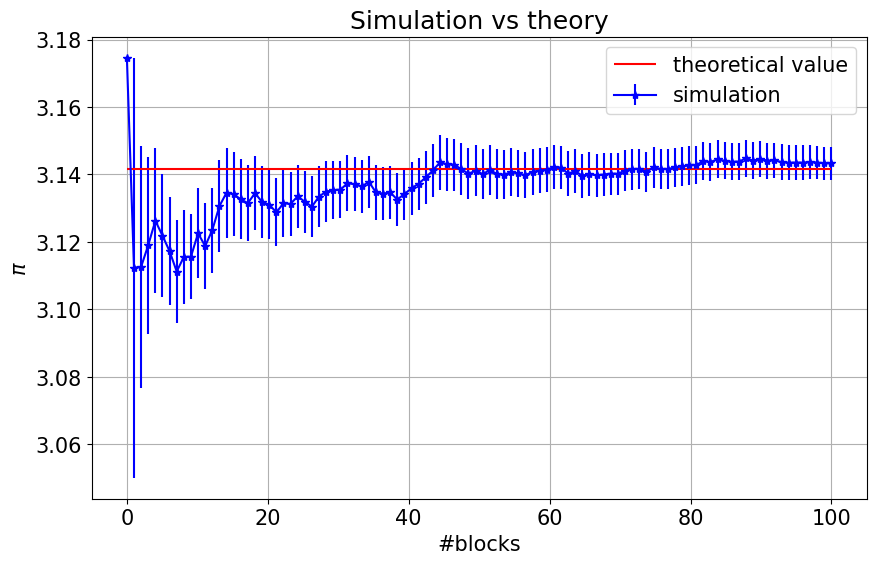

best estimated pi value =  3.1433 +/- 0.0049


In [18]:
N=100  #n blocchi
x = np.linspace(0,100,100)
fig = plt.figure(figsize = (10,6))
plt.errorbar(x,means,yerr=stds, label="simulation",marker="*",color="blue")
plt.hlines(np.pi,0,N,color="red", label = "theoretical value")
plt.legend()
plt.xlabel('#blocks')
plt.ylabel(r'$\pi$')
plt.grid(True)
plt.title("Simulation vs theory")

plt.show()

print("best estimated pi value = ", round(means[-1],4), "+/-", round(stds[-1],4))